# Exercice 1: Application du classifieur k-NN de scikit-learn

In [1]:
# Importer les modules nécéssaires
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification 


In [19]:

# Générer le jeu de données
X, y = make_classification(n_samples=100, n_features=2,n_informative=2,n_repeated=0,n_redundant=0, n_classes=2, random_state=43)

#n_samples contrôle le nombre total d'échantillons générés.
#n_features définit le nombre de caractéristiques du jeu de données.
#n_classes détermine le nombre de classes dans le jeu de données.
#n_clusters_per_class spécifie le nombre de clusters par classe.

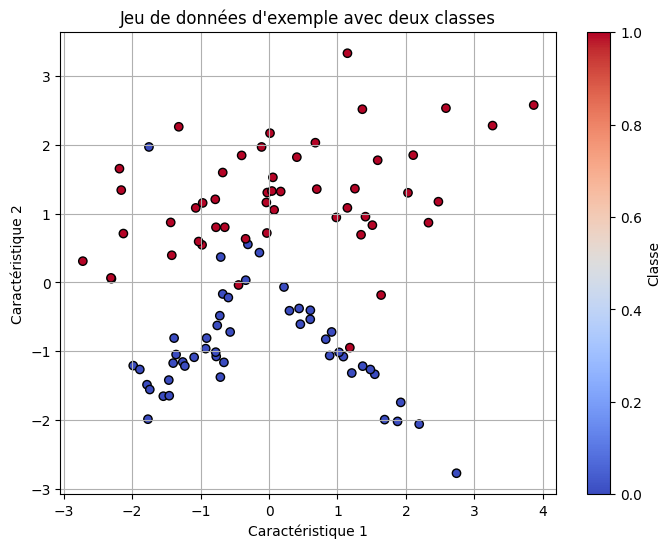

In [20]:

# Visualisation du jeu de données
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, marker='o', edgecolors='k')
plt.xlabel('Caractéristique 1')
plt.ylabel('Caractéristique 2')
plt.title('Jeu de données d\'exemple avec deux classes')
plt.colorbar(label='Classe')
plt.grid(True)
plt.show()


In [21]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Division du jeu de données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Vérification des tailles des ensembles de données
print("Taille de l'ensemble d'entraînement :", X_train.shape[0])
print("Taille de l'ensemble de test :", X_test.shape[0])

# Vérification du nombre de caractéristiques
print("Nombre de caractéristiques :", X_train.shape[1])

# Vérification des différentes classes dans les valeurs cibles
print("Classes dans les valeurs cibles :", np.unique(y))

Taille de l'ensemble d'entraînement : 70
Taille de l'ensemble de test : 30
Nombre de caractéristiques : 2
Classes dans les valeurs cibles : [0 1]


In [31]:

# Entraînement du classifieur k-NN
knn_classifier = KNeighborsClassifier(n_neighbors=3)
knn_classifier.fit(X_train, y_train)

# Prédiction des étiquettes pour l'ensemble de test
y_pred = knn_classifier.predict(X_test)

# Calcul du score du modèle sur l'ensemble de test
accuracy = accuracy_score(y_test, y_pred)
print("Score du modèle sur l'ensemble de test :", accuracy)


Score du modèle sur l'ensemble de test : 0.9333333333333333


-Le classifieur k-NN utilise par défaut la distance euclidienne pour trouver les voisins les plus proches.

-La méthode score() utilise par défaut la mesure de précision (accuracy) pour évaluer les performances du modèle.

In [32]:
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt

# Définir différentes tailles de sous-ensembles
train_sizes, train_scores, test_scores = learning_curve(
    knn_classifier, X, y, train_sizes=[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9], cv=5)


In [33]:

# Calculer les moyennes et les écarts-types des scores d'entraînement et de test
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)


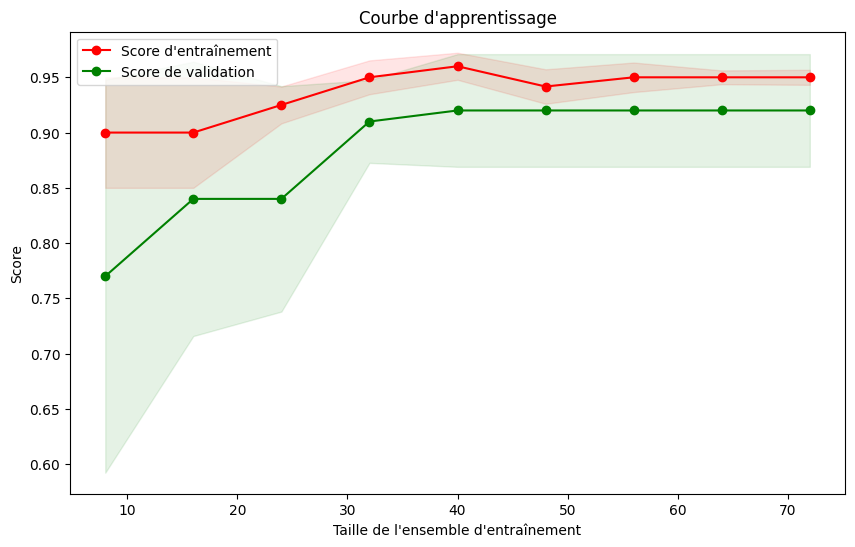

In [34]:

# Tracer la courbe d'apprentissage
plt.figure(figsize=(10, 6))
plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1,
                 color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
         label="Score d'entraînement")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
         label="Score de validation")
plt.xlabel("Taille de l'ensemble d'entraînement")
plt.ylabel("Score")
plt.title("Courbe d'apprentissage")
plt.legend(loc="best")
plt.show()


Cette courbe d'apprentissage montre comment les scores d'entraînement et de validation évoluent en fonction de la taille de l'ensemble d'entraînement. Les zones ombrées représentent l'écart-type des scores.

En général, lorsque la taille de l'ensemble d'entraînement augmente, les scores d'entraînement diminuent tandis que les scores de validation augmentent. Cela indique une meilleure généralisation du modèle à mesure que davantage de données sont disponibles pour l'entraînement.

# Exercice 2: Implémentez votre propre régresseur k-NN en Python

In [39]:
import numpy as np
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
#classe KNNRegressor qui contient les méthodes nécessaires pour calculer la distance euclidienne et la distance de Manhattan
class KNNRegressor:
    def __init__(self, k=3, distance='euclidean'):
        self.k = k
        self.distance = distance

    def euclidean_distance(self, x1, x2):
        return np.sqrt(np.sum((x1 - x2) ** 2))

    def manhattan_distance(self, x1, x2):
        return np.sum(np.abs(x1 - x2))

    def get_distance(self, x1, x2):
        if self.distance == 'euclidean':
            return self.euclidean_distance(x1, x2)
        elif self.distance == 'manhattan':
            return self.manhattan_distance(x1, x2)
    #la méthode predict pour faire des prédictions
    def predict(self, X_train, y_train, X_test):
        predictions = []
        for test_point in X_test:
            distances = []
            for train_point, label in zip(X_train, y_train):
                dist = self.get_distance(test_point, train_point)
                distances.append((dist, label))
            distances.sort(key=lambda x: x[0])
            neighbors = distances[:self.k]
            prediction = np.mean([neighbor[1] for neighbor in neighbors])
            predictions.append(prediction)
        return predictions

In [40]:
# Générer le jeu de données de régression
X, y = make_regression(n_samples=100, n_features=1, noise=0.1, random_state=42)

# Diviser le jeu de données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [52]:

# Test du modèle pour différentes valeurs de k
for k in [1,3,5]:
    for distance in ['euclidean', 'manhattan']:
        knn_regressor = KNNRegressor(k=k, distance=distance)
        y_pred = knn_regressor.predict(X_train, y_train, X_test)
        mse = mean_squared_error(y_test, y_pred)
        print(f"k = {k}, distance = {distance}, MSE = {mse}")


k = 1, distance = euclidean, MSE = 1.6919879883829163
k = 1, distance = manhattan, MSE = 1.6919879883829163
k = 3, distance = euclidean, MSE = 3.3561914641792128
k = 3, distance = manhattan, MSE = 3.3561914641792128
k = 5, distance = euclidean, MSE = 2.5044349463011626
k = 5, distance = manhattan, MSE = 2.5044349463011626


En observant les résultats, nous pouvons déterminer que k=1 est le meilleur paramètre et donne le meilleur modèle, car la MSE est plus basse.

Les raisons possibles : 

Avec k = 1, le modèle s'ajuste exactement aux données d'entraînement, ce qui signifie qu'il peut capturer des modèles très complexes dans les données. Cela peut être utile si le problème est hautement non linéaire ou s'il existe des relations complexes entre les caractéristiques et la cible.

Avec k = 1, le modèle peut être très flexible.

# Exercice 3: Validation croisée Kfold

In [53]:
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

# Définition des valeurs de k à tester
param_grid = {'n_neighbors': [1, 3, 5, 7, 9]}

# Création du modèle k-NN
knn_regressor = KNeighborsRegressor()

In [54]:

# Création de l'objet GridSearchCV avec la validation croisée KFold
kfold = KFold(n_splits=5, shuffle=True, random_state=42)
grid_search = GridSearchCV(knn_regressor, param_grid, cv=kfold, scoring='neg_mean_squared_error')

# Exécution de la recherche sur la grille
grid_search.fit(X_train, y_train)

# Affichage des meilleurs paramètres et scores
print("Meilleur nombre de voisins (k) :", grid_search.best_params_['n_neighbors'])
print("Meilleur score moyen de validation croisée (MSE) :", -grid_search.best_score_)

Meilleur nombre de voisins (k) : 1
Meilleur score moyen de validation croisée (MSE) : 18.465217331985862


In [55]:
# Retraînement du modèle avec le meilleur k sélectionné
best_k = grid_search.best_params_['n_neighbors']
best_model = KNeighborsRegressor(n_neighbors=best_k)
best_model.fit(X_train, y_train)

# Test du modèle sur l'ensemble de test
y_pred = best_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("Erreur quadratique moyenne (MSE) du meilleur modèle sur l'ensemble de test :", mse)


Erreur quadratique moyenne (MSE) du meilleur modèle sur l'ensemble de test : 1.6919879883829163
